# 1주차 심화과제
# MNIST 예측 모델에 deep learning techniques 적용하기


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


- CIFAR10의 입력 shape 확인
 - CIFAR10은 MNIST와 다른 입력 shape을 가지고 있습니다.
 - 입력 shape은 model을 선언할 때 중요하기 때문에 MNIST 실습 자료에서 사용한 방식과 똑같이 shape을 확인해주시면 됩니다.

- Dataset 및 activation 함수 변경
    - Dataset을 MNIST에서 [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)으로 변경해줍니다.
    - Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경해줍니다.
    - 학습 인자는 `n_epochs` = 50, `batch_size` = 256로 설정합니다.



In [ ]:
transform = transforms.ToTensor()

# MNIST에서 CIFAR10으로 변경
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


50000
torch.Size([3, 32, 32]) 6


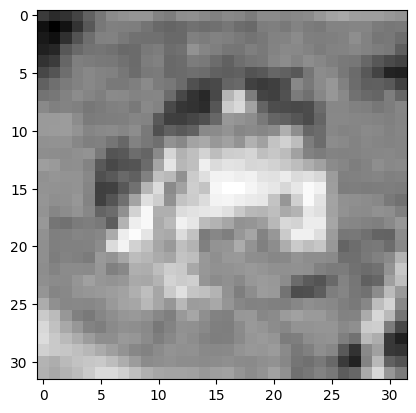

In [ ]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

# 심화과제 - plot1
- SGD와 Adam 성능 비교
 - 먼저 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)을 사용하여 학습하는 코드를 구현합니다.
 - (Plot 1) SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도를 plot합니다.

In [ ]:
from torch.optim import SGD,Adam

lr = 0.001

model1 = model1.to('cuda')
model2 = model2.to('cuda')

optimizer_sgd = SGD(model1.parameters(), lr=lr)
optimizer_adam = Adam(model2.parameters(), lr=lr)

Epoch   0 | SGD Accuracy: 0.1094 | Adam Accuracy: 0.3865
Epoch   1 | SGD Accuracy: 0.1184 | Adam Accuracy: 0.4171
Epoch   2 | SGD Accuracy: 0.1593 | Adam Accuracy: 0.4511
Epoch   3 | SGD Accuracy: 0.1797 | Adam Accuracy: 0.4538
Epoch   4 | SGD Accuracy: 0.1818 | Adam Accuracy: 0.4693
Epoch   5 | SGD Accuracy: 0.1766 | Adam Accuracy: 0.4808
Epoch   6 | SGD Accuracy: 0.1755 | Adam Accuracy: 0.4917
Epoch   7 | SGD Accuracy: 0.1793 | Adam Accuracy: 0.5001
Epoch   8 | SGD Accuracy: 0.1913 | Adam Accuracy: 0.4997
Epoch   9 | SGD Accuracy: 0.2083 | Adam Accuracy: 0.5127
Epoch  10 | SGD Accuracy: 0.2175 | Adam Accuracy: 0.5177
Epoch  11 | SGD Accuracy: 0.2238 | Adam Accuracy: 0.5298
Epoch  12 | SGD Accuracy: 0.2360 | Adam Accuracy: 0.5335
Epoch  13 | SGD Accuracy: 0.2483 | Adam Accuracy: 0.5427
Epoch  14 | SGD Accuracy: 0.2535 | Adam Accuracy: 0.5538
Epoch  15 | SGD Accuracy: 0.2565 | Adam Accuracy: 0.5460
Epoch  16 | SGD Accuracy: 0.2608 | Adam Accuracy: 0.5453
Epoch  17 | SGD Accuracy: 0.261

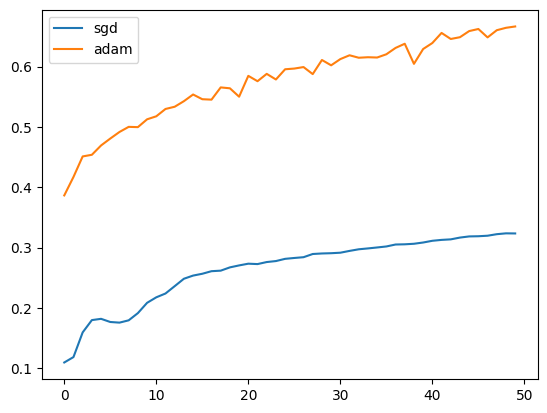

In [ ]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='sgd', label2='adam'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs_sgd = []
train_accs_adam = []

for epoch in range(n_epochs):
  total_train_loss_sgd = 0.
  total_train_loss_adam = 0.

  for data in trainloader:

    # SGD 모델 학습
    model1.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model1(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_sgd.step()
    total_train_loss_sgd += loss.item()

    # Adam 모델 학습
    model2.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model2(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_adam.step()
    total_train_loss_adam += loss.item()

  acc_sgd = accuracy(model1, trainloader)
  acc_adam = accuracy(model2, trainloader)

  train_accs_sgd.append(acc_sgd)
  train_accs_adam.append(acc_adam)


  print(f"Epoch {epoch:3d} | SGD Accuracy: {acc_sgd:.4f} | Adam Accuracy: {acc_adam:.4f}")

plot_acc(train_accs_sgd, train_accs_adam)



#심화 과제 - plot2

- [ ]  Leaky ReLU와 Sigmoid 성능 비교
    - Activation 함수가 `nn.Sigmoid`인 class를 새로 정의합니다.
    - (Plot 2) Adam optimizer를 가지고 sigmoid와 leaky ReLU 모델들을 학습한 후, epoch에 따른 train 정확도를 비교합니다.

In [ ]:
from torch import nn


class Model2(nn.Module):
  def __init__(self, input_dim, n_dim,act_type):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    self.act_type = act_type

    #구분값에 따라 Leaky ReLU와 Sigmoid 선택
    if  act_type == 'l':
      self.act = nn.LeakyReLU()
    else:
      self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


model1 = Model2(32 * 32 * 3, 128,'l')
model2 = Model2(32 * 32 * 3, 128,'s')

In [ ]:
from torch.optim import SGD,Adam

lr = 0.001

model1 = model1.to('cuda')
model2 = model2.to('cuda')
# Leaky ReLU와 Sigmoid optimizer adam으로 설정
optimizer_lr = Adam(model1.parameters(), lr=lr)
optimizer_sm = Adam(model2.parameters(), lr=lr)

Epoch   0 | LeakyReLU Accuracy: 37.5400% | Sigmoid Accuracy: 32.2280%
Epoch   0 | LeakyReLU Loss: 0.7428% | Sigmoid Loss: 0.7982%
Epoch   1 | LeakyReLU Accuracy: 40.2500% | Sigmoid Accuracy: 35.5540%
Epoch   1 | LeakyReLU Loss: 0.6668% | Sigmoid Loss: 0.7172%
Epoch   2 | LeakyReLU Accuracy: 42.7820% | Sigmoid Accuracy: 38.9160%
Epoch   2 | LeakyReLU Loss: 0.6339% | Sigmoid Loss: 0.6862%
Epoch   3 | LeakyReLU Accuracy: 46.0680% | Sigmoid Accuracy: 38.6120%
Epoch   3 | LeakyReLU Loss: 0.6118% | Sigmoid Loss: 0.6626%
Epoch   4 | LeakyReLU Accuracy: 46.3120% | Sigmoid Accuracy: 40.6840%
Epoch   4 | LeakyReLU Loss: 0.5959% | Sigmoid Loss: 0.6453%
Epoch   5 | LeakyReLU Accuracy: 47.9860% | Sigmoid Accuracy: 43.6960%
Epoch   5 | LeakyReLU Loss: 0.5780% | Sigmoid Loss: 0.6297%
Epoch   6 | LeakyReLU Accuracy: 47.3400% | Sigmoid Accuracy: 44.2640%
Epoch   6 | LeakyReLU Loss: 0.5685% | Sigmoid Loss: 0.6153%
Epoch   7 | LeakyReLU Accuracy: 50.7100% | Sigmoid Accuracy: 45.1080%
Epoch   7 | LeakyReL

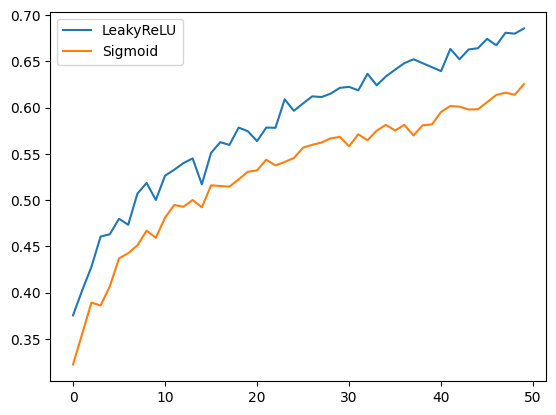

In [ ]:
import numpy as np

def accuracy2(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc2(train_accs, test_accs, label1='LeakyReLU', label2='Sigmoid'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs_lr = []
train_accs_sm = []

for epoch in range(n_epochs):
  total_train_loss_lr = 0.
  total_train_loss_sm = 0.

  for data in trainloader:

    # Leaky ReLU
    model1.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model1(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_lr.step()
    total_train_loss_lr += loss.item()

    # Sigmoid
    model2.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model2(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_sm.step()
    total_train_loss_sm += loss.item()



  lr_acc = accuracy2(model1, trainloader)
  sm_acc = accuracy2(model2, trainloader)

  train_accs_lr.append(lr_acc)
  train_accs_sm.append(sm_acc)


  print(f"Epoch {epoch:3d} | LeakyReLU Accuracy: {lr_acc * 100 :.4f}% | Sigmoid Accuracy: {sm_acc * 100:.4f}%")
  print(f"Epoch {epoch:3d} | LeakyReLU Loss: {total_train_loss_lr / len(trainloader.dataset)*100  :.4f}% | Sigmoid Loss: {total_train_loss_sm / len(trainloader.dataset)*100:.4f}%")

plot_acc2(train_accs_lr, train_accs_sm)



Files already downloaded and verified


#심화 과제 - plot3

- Dropout을 적용한 이후의 generalization error 확인
    - PyTorch [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 leaky ReLU를 사용하는 MLP의 모든 layer에 적용한 class를 새로 정의합니다. Dropout 확률은 0.1로 설정합니다.
    - 학습 코드에서 다음 부분들을 추가해줍니다:
        - `model.train()`을 `for data in trainloader:` 이전 줄에 둡니다.
        - `trainloader`와 `testloader`에 대한 정확도를 계산하는 코드를 다음과 같이 변경합니다:
            
            ```python
            with torch.no_grad():
              model.eval()
              <기존 정확도 계산 코드>
            ```
            
    - (Plot 3) Adam optimizer를 가지고 dropout을 적용한 모델을 학습한 후, epoch에 따른 train과 test 정확도를 비교합니다.

In [ ]:
from torch import nn


class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    self.act = nn.LeakyReLU()
    # dropout 설정
    self.dropout = nn.Dropout(0.1)


  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.dropout(x)
    x = self.act(self.layer2(x))
    x = self.dropout(x)
    x = self.layer3(x)

    return x


model = Model3(32 * 32 * 3, 128)

In [ ]:
from torch.optim import SGD,Adam

lr = 0.001

model = model.to('cuda')
# adam으로 설정
optimizer = Adam(model.parameters(), lr=lr)

Epoch   0 | Train Accuracy: 44.4960% | Test Accuracy: 43.5600%
Epoch   0 | Train Loss: 0.6411% | Test Loss: 0.1261%
Epoch   1 | Train Accuracy: 46.1140% | Test Accuracy: 45.3200%
Epoch   1 | Train Loss: 0.6262% | Test Loss: 0.1227%
Epoch   2 | Train Accuracy: 46.2460% | Test Accuracy: 45.2300%
Epoch   2 | Train Loss: 0.6128% | Test Loss: 0.1224%
Epoch   3 | Train Accuracy: 47.8500% | Test Accuracy: 46.5300%
Epoch   3 | Train Loss: 0.6046% | Test Loss: 0.1204%
Epoch   4 | Train Accuracy: 48.2880% | Test Accuracy: 47.0100%
Epoch   4 | Train Loss: 0.5955% | Test Loss: 0.1183%
Epoch   5 | Train Accuracy: 48.8200% | Test Accuracy: 47.2000%
Epoch   5 | Train Loss: 0.5898% | Test Loss: 0.1194%
Epoch   6 | Train Accuracy: 49.9300% | Test Accuracy: 47.7600%
Epoch   6 | Train Loss: 0.5819% | Test Loss: 0.1170%
Epoch   7 | Train Accuracy: 51.3900% | Test Accuracy: 49.4700%
Epoch   7 | Train Loss: 0.5766% | Test Loss: 0.1142%
Epoch   8 | Train Accuracy: 51.5580% | Test Accuracy: 49.1000%
Epoch   8

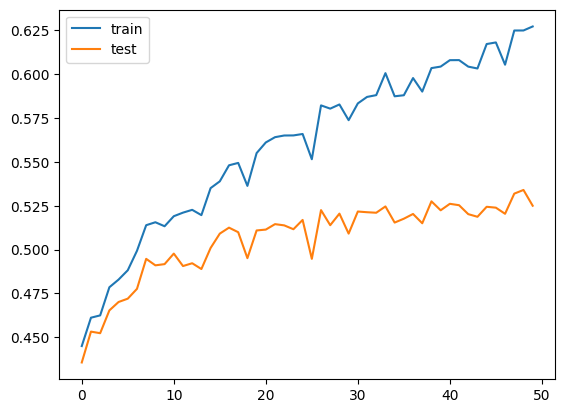

In [ ]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_train_loss = 0.
  total_test_loss = 0.
  train_loss = 0.
  test_loss = 0.

  model.train()
  for data in trainloader:
    # train
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer.step()
    total_train_loss += loss.item()


  with torch.no_grad():
    model.eval()

    for data in testloader:
      # test
      inputs, labels = data
      inputs, labels = inputs.to('cuda'), labels.to('cuda')
      preds = model(inputs)
      loss = nn.CrossEntropyLoss()(preds, labels)

      total_test_loss += loss.item()


    train_accuracy = accuracy(model, trainloader)
    test_accuracy = accuracy(model, testloader)

    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)


  print(f"Epoch {epoch:3d} | Train Accuracy: {train_accuracy * 100 :.4f}% | Test Accuracy: {test_accuracy * 100:.4f}%")
  print(f"Epoch {epoch:3d} | Train Loss: {total_train_loss / len(trainloader.dataset)*100  :.4f}% | Test Loss: {total_test_loss / len(trainloader.dataset)*100:.4f}%")

plot_acc(train_accs, test_accs)

